### Lodaing Demand Data

In [1]:
import pandas as pd
import h5py
import pyhdf
from pyhdf.SD import SD, SDC
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.cm as cm
import math
import pickle
from osgeo import ogr, osr
from scipy.stats.stats import pearsonr
import gzip
from osgeo import ogr, osr
import zipfile
import pdb
import matplotlib.ticker as mticker
from datetime import datetime


indir = r"C:\Bike_TH\Raw_File"
os.chdir(indir)
fileList=glob.glob("*zip")


freq_dict={}



for filename in fileList[:]:
    
    print('working on :', filename)

    with zipfile.ZipFile(filename, 'r') as zfile:
        print(zfile.namelist()[0])
        byte_file =zfile.read(zfile.namelist()[0]).decode('utf-8').split('\n')
        for i,line in enumerate(byte_file):
            line_split=line.split(",")
            if len(line_split)>1 and i>0:
                try:
                    time=datetime.strptime(line_split[1].split(' ')[0],'%m/%d/%Y')
                except:
                    time=datetime.strptime(line_split[1].split(' ')[0],'%Y-%m-%d')
                if time not in freq_dict:
                    freq_dict[time]=1
                else:
                    freq_dict[time]+=1

working on : 2010-Q4-cabi-trip-history-data.zip
2010-Q4-cabi-trip-history-data.csv
working on : 2011-Q1-cabi-trip-history-data.zip
2011-Q1-cabi-trip-history-data.csv
working on : 2011-Q2-cabi-trip-history-data.zip
2011-Q2-cabi-trip-history-data.csv
working on : 2011-Q3-cabi-trip-history-data.zip
2011-Q3-cabi-trip-history-data.csv
working on : 2011-Q4-cabi-trip-history-data.zip
2011-Q4-cabi-trip-history-data.csv
working on : 2012-Q1-cabi-trip-history-data.zip
2012-Q1-cabi-trip-history-data.csv
working on : 2012-Q2-cabi-trip-history-data.zip
2012-Q2-cabi-trip-history-data.csv
working on : 2012-Q3-cabi-trip-history-data.zip
2012-Q3-cabi-trip-history-data.csv
working on : 2012-Q4-cabi-trip-history-data.zip
2012-Q4-cabi-trip-history-data.csv
working on : 2013-Q1-cabi-trip-history-data.zip
2013-Q1-cabi-trip-history-data.csv
working on : 2013-Q2-cabi-trip-history-data.zip
2013-Q2-cabi-trip-history-data.csv
working on : 2013-Q3-cabi-trip-history-data.zip
2013-Q3-cabi-trip-history-data.csv
work

# Visualizing Data

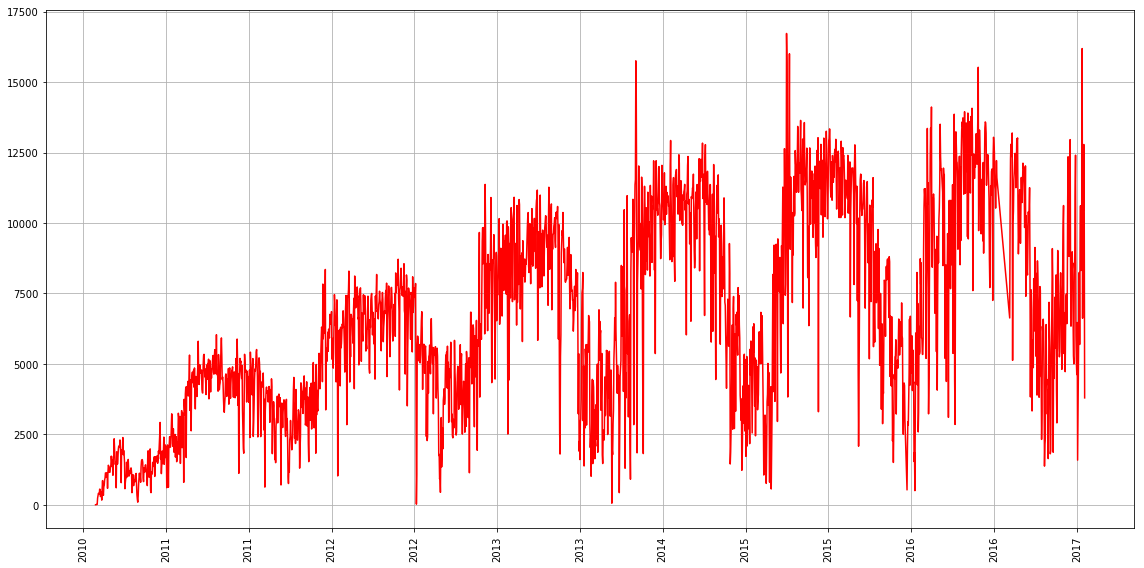

In [3]:
DATE=sorted(freq_dict.keys())
freq=[]

for dt in DATE:
    freq.append(freq_dict[dt])

#DATE=[datetime.strptime(dt,'%m/%d/%Y') for dt in date]
fig=plt.figure(figsize= (16,8))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=3, colspan=1)

ax1.plot(DATE,freq,'-', color='r')


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(15))
plt.tight_layout()
plt.grid()
plt.savefig(r"C:\Bike_TH\bike_trend.png",dpi=400)
plt.show()

# Loading Crash Data

In [ ]:
import pandas as pd
crash_infile= r"C:\Bike_TH\Crashes_in_DC.csv"
crash_df=pd.read_csv(crash_infile, usecols=['REPORTDATE','LATITUDE', 'LONGITUDE','MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST','UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST','TOTAL_BICYCLES'])
crash_df.head()



# Loading New Crash Data

In [4]:
indir="C:\Bike_TH\Crash-_Data\Crash _Data"
os.chdir(indir)
fileList=glob.glob("*txt")

In [ ]:
fileList

In [5]:
crash_count_dict={}
for file in fileList:
    print('working on :', file)
    crash_df=pd.read_csv(file,'\t')
    for index, row in crash_df.iterrows():
        #print(row['accdate'])
        yr=str(int(row['accdate']))[-4:]
       
        day=str(int(row['accdate']))[-6:-4]
        month=str(int(row['accdate']))[:-6]

        time=datetime.strptime(month+'/'+day+'/'+yr,'%m/%d/%Y')

        #print(month,day,yr,':',time)
        
        if yr!='2016':
            fatal=int(row['numfatal'])
            injury=int(row['injury'])
        
            if time not in crash_count_dict:
                crash_count_dict[time]=[1,fatal,injury]
            else:
                crash_count_dict[time][0]+=1
                crash_count_dict[time][1]+=fatal
                crash_count_dict[time][2]+=injury
        else:
            if time not in crash_count_dict:
                crash_count_dict[time]=[1,0,0]
            else:
                crash_count_dict[time][0]+=1
        

working on : Crash_2010.txt
working on : Crash_2011.txt
working on : Crash_2012.txt
working on : Crash_2013.txt
working on : Crash_2014.txt
working on : Crash_2015.txt
working on : Crash_2016.txt


In [ ]:
crash_count_dict

In [6]:
crash_df.head()

,Obs.,statenum,casenum,pnumber,accdate,latitude,longitude,crashtype,Unnamed: 8
0,1,24,52,1,1032016,38.290428,-76.490725,280,NaN
1,2,24,88,1,4102016,38.637256,-76.950364,380,NaN
2,3,24,139,1,6022016,39.139233,-77.196197,800,NaN
3,4,24,142,1,6092016,39.626275,-77.698369,319,NaN
4,5,24,175,1,6062016,39.165833,-76.629403,280,NaN


In [7]:
crash_df.columns
crash_df.head()
crash_df['accdate']

0      1032016
1      4102016
2      6022016
3      6092016
4      6062016
5      6292016
6      8242016
7      8262016
8      6082016
9      9122016
10    10172016
11    10232016
12    10012016
13     7172016
14    11252016
15    10232016
Name: accdate, dtype: int64

## Filtering Bicycle Data

In [ ]:
df=crash_df.sort_values('FATAL_BICYCLIST')
df=df[df['TOTAL_BICYCLES']>0]
len(df)

In [ ]:
crash_count_dict={}
for index, row in df.iterrows():
    time=str(row['REPORTDATE']).split('T')[0]
    date=datetime.strptime(time, '%Y-%m-%d')
    if date not in crash_count_dict:
        crash_count_dict[date]=1
    else:
        crash_count_dict[date]+=1
    

In [8]:
crash_DATE=sorted(crash_count_dict.keys())

In [9]:
type(crash_DATE[0].year)

int

## Visualizing Crash Data

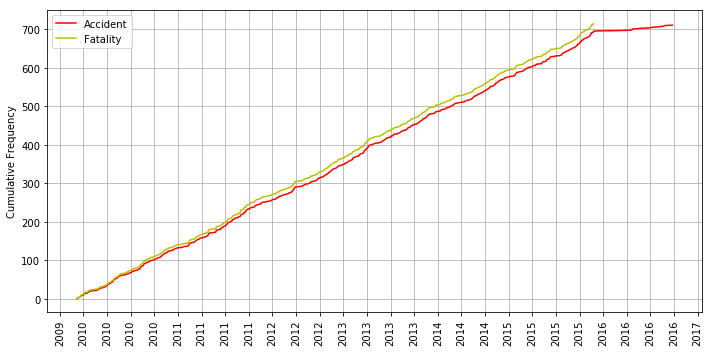

In [30]:
crash_DATE=sorted(crash_count_dict.keys())
crash_freq=[]
fatal_list=[]
injury_list=[]
cum_crash=0
cum_fatal=0
cum_injury=0
for dt in crash_DATE:
    cum_crash+=crash_count_dict[dt][0]
    
    
    crash_freq.append(cum_crash)
    if dt.year!=2016:
        cum_fatal+=crash_count_dict[dt][1]
        cum_injury+=crash_count_dict[dt][2]
        fatal_list.append(cum_fatal)
        injury_list.append(cum_injury)

#DATE=[datetime.strptime(dt,'%m/%d/%Y') for dt in date]
fig=plt.figure(figsize= (10,5))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=3, colspan=1)
plt.ylabel('Cumulative Frequency')
#ax2 = ax1.twinx()
#plt.ylabel('Cumulative Injury Frequency')

ax1.plot(crash_DATE,crash_freq,'-', color='r',label='Accident')
ax1.plot(crash_DATE[:len(fatal_list)],fatal_list,color='y',label='Fatality')
#ax2.plot(crash_DATE[:len(injury_list)],injury_list,color='g',label='Injury')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(29))
ax1.legend()
ax2.legend(loc='upper center')
plt.tight_layout()
plt.grid()
plt.savefig(r"C:\Bike_TH\crash_trend.png",dpi=400)
plt.show()

In [11]:
crash_DATE

[datetime.datetime(2010, 1, 1, 0, 0),
 datetime.datetime(2010, 1, 2, 0, 0),
 datetime.datetime(2010, 1, 3, 0, 0),
 datetime.datetime(2010, 1, 11, 0, 0),
 datetime.datetime(2010, 1, 13, 0, 0),
 datetime.datetime(2010, 1, 16, 0, 0),
 datetime.datetime(2010, 1, 17, 0, 0),
 datetime.datetime(2010, 1, 23, 0, 0),
 datetime.datetime(2010, 1, 26, 0, 0),
 datetime.datetime(2010, 1, 30, 0, 0),
 datetime.datetime(2010, 2, 1, 0, 0),
 datetime.datetime(2010, 2, 14, 0, 0),
 datetime.datetime(2010, 2, 17, 0, 0),
 datetime.datetime(2010, 2, 18, 0, 0),
 datetime.datetime(2010, 2, 24, 0, 0),
 datetime.datetime(2010, 3, 6, 0, 0),
 datetime.datetime(2010, 3, 19, 0, 0),
 datetime.datetime(2010, 4, 2, 0, 0),
 datetime.datetime(2010, 4, 6, 0, 0),
 datetime.datetime(2010, 4, 11, 0, 0),
 datetime.datetime(2010, 4, 16, 0, 0),
 datetime.datetime(2010, 4, 25, 0, 0),
 datetime.datetime(2010, 4, 26, 0, 0),
 datetime.datetime(2010, 5, 1, 0, 0),
 datetime.datetime(2010, 5, 4, 0, 0),
 datetime.datetime(2010, 5, 6, 0, 

In [ ]:
DATE

In [ ]:
print(len(DATE))

In [ ]:
print(len(crash_DATE))

### Processing Correlation data

In [12]:
dmnd_on_crash_date=[]
crash=[]
req_date=[]
for dt in crash_DATE:
    try:
        
        dmnd_on_crash_date.append(freq_dict[dt])
        crash.append(crash_count_dict[dt][0])
        req_date.append(dt)
    except:
        pass
           

In [ ]:
len(crash)

### Visualizing Correlation

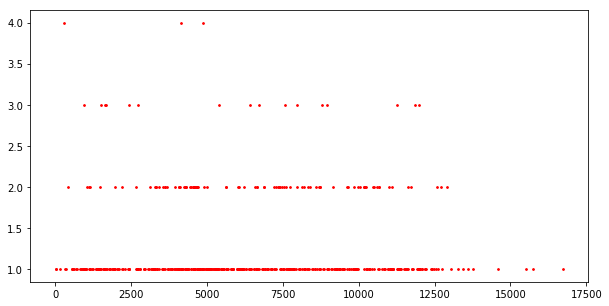

In [13]:

a, b = np.polyfit(np.array(dmnd_on_crash_date), np.array(crash), deg=1)
f = lambda x: a*x + b

fig=plt.figure(figsize= (10,5))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=3, colspan=1)
x=np.linspace(min(dmnd_on_crash_date),max(dmnd_on_crash_date),num=50)
#ax1.plot(x,f(x))  
ax1.scatter(dmnd_on_crash_date,crash,color='r',s=3)
#    ax1.plot_date(DATE,dpu,color='r',label='DPU')
#plt.savefig(r"C:\New_Project\combined_result\rain_dpu_%s.png"%ARR,dpi=400)
plt.show()


In [ ]:
from ggplot import *

dmnd_crash=pd.DataFrame(np.column_stack([dmnd_on_crash_date,crash]), columns=['demand','crash'])

dmnd_crash=dmnd_crash.dropna()

ggplot(aes(x=dmnd_crash.demand, y=dmnd_crash.crash), data=dmnd_crash) + geom_point() + stat_smooth(colour='blue', span=0.2)

In [ ]:
dmnd_crash=pd.DataFrame(np.column_stack([dmnd_on_crash_date,crash]), columns=['demand','crash'])
dmnd_crash.head()

In [ ]:
dmnd_crash['crash'].dtype

## loading weather data

In [14]:
wt_inpfile="C:\Bike_TH\weather_dat.csv"

wt_df=pd.read_csv(wt_inpfile)
wt_df.tail()

,date,temp,wind,vis,rain
2826,9/27/2017,82,10,10,0
2827,9/28/2017,74,14,10,0
2828,9/29/2017,67,7,10,0
2829,9/30/2017,64,15,10,0
2830,10/1/2017,58,11,10,0


In [107]:
len(req_date)

506

In [15]:
weather_dict={}
for index, row in wt_df.iterrows():
    wt_time=row['date']
 
    wt_date=datetime.strptime(wt_time, '%m/%d/%Y')
    weather_dict[wt_date]=[row['temp'],row['wind'],row['vis'],row['rain']]


In [ ]:
## preparing file for ML model

In [16]:
ml_ft_outfile= open(r"C:\Bike_TH\featrue_file_new.csv",'w')
ml_ft_outfile.write('month'+','+'day'+','+'temp'+','+'wind'+','+'vis'+','+'rain'+','+'demand'+','+'crash'+'\n')

42

In [17]:
for date in req_date:
    month=date.strftime("%B")
    day_name=date.strftime("%A")
    ml_ft_outfile.write(str(month)+','+str(day_name)+','+str(weather_dict[date][0])+','+str(weather_dict[date][1])+','+str(weather_dict[date][2])+','+str(weather_dict[date][3])+','+str(freq_dict[date])+','+str(crash_count_dict[date][0])+'\n')
ml_ft_outfile.close()    

## load feature data

In [18]:
feature_file=r"C:\Bike_TH\featrue_file.csv" 

In [19]:
ft_df=pd.read_csv(feature_file)
ft_df=ft_df.sort_values('crash')
ft_df.tail()

,month,day,temp,wind,vis,rain,demand,crash
374,January,Wednesday,53,6,10,0,9024,8
209,June,Thursday,68,10,10,0,13423,8
266,August,Wednesday,86,11,9,0,12258,8
262,August,Saturday,85,8,10,0.06,11340,9
210,June,Friday,73,10,10,0,13730,13


In [20]:
month_set=set()
day_set=set()

for index, row in ft_df.iterrows():
    month_set.add(row['month'])
    day_set.add(row['day'])


In [21]:
feature_file_mod=open(r"C:\Bike_TH\featrue_file_mod.csv",'w') 
feature_file_mod.write('month'+','+'day'+','+'temp'+','+'wind'+','+'vis'+','+'rain'+','+'demand'+','+'crash'+'\n')

42

In [22]:
print(month_set)
print(day_set)

{'February', 'January', 'June', 'March', 'July', 'August', 'May', 'September', 'November', 'December', 'April', 'October'}
{'Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Friday', 'Saturday', 'Sunday'}


In [23]:
month_index={'July':7, 'April':4, 'June':6, 'January':1, 'May':5, 'August':8, 'December':12, 'February':2, 'October':10, 'March':3, 'November':11, 'September':9}

day_index={'Friday':5, 'Sunday':7, 'Tuesday':2, 'Saturday':6, 'Monday':1, 'Wednesday':3, 'Thursday':4}

In [24]:
month_index


{'April': 4,
 'August': 8,
 'December': 12,
 'February': 2,
 'January': 1,
 'July': 7,
 'June': 6,
 'March': 3,
 'May': 5,
 'November': 11,
 'October': 10,
 'September': 9}

In [25]:
for index, row in ft_df.iterrows():
    feature_file_mod.write(str(month_index[row['month']])+','+str(day_index[row['day']])+','+str(row['temp'])+','+str(row['wind'])+','+str(row['vis'])+','+str(row['rain'])+','+str(row['demand'])+','+str(row['crash'])+'\n')

    
feature_file_mod.close()

# Demand Modeling

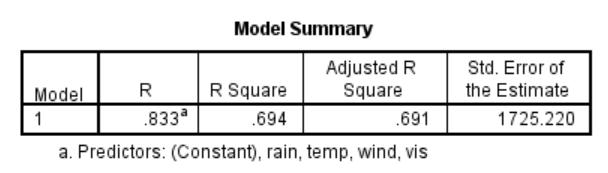


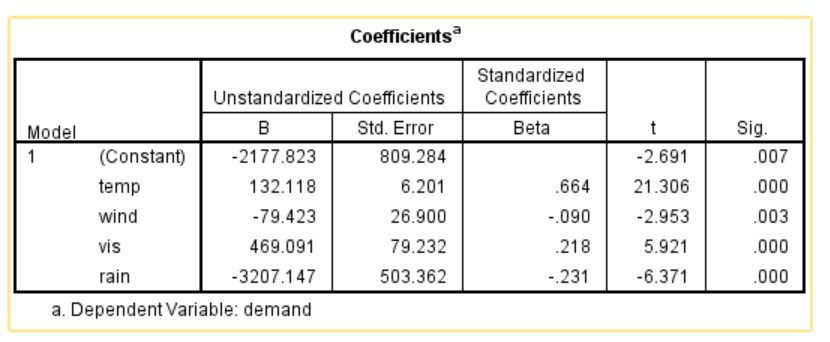

C:\Users\Kamol\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


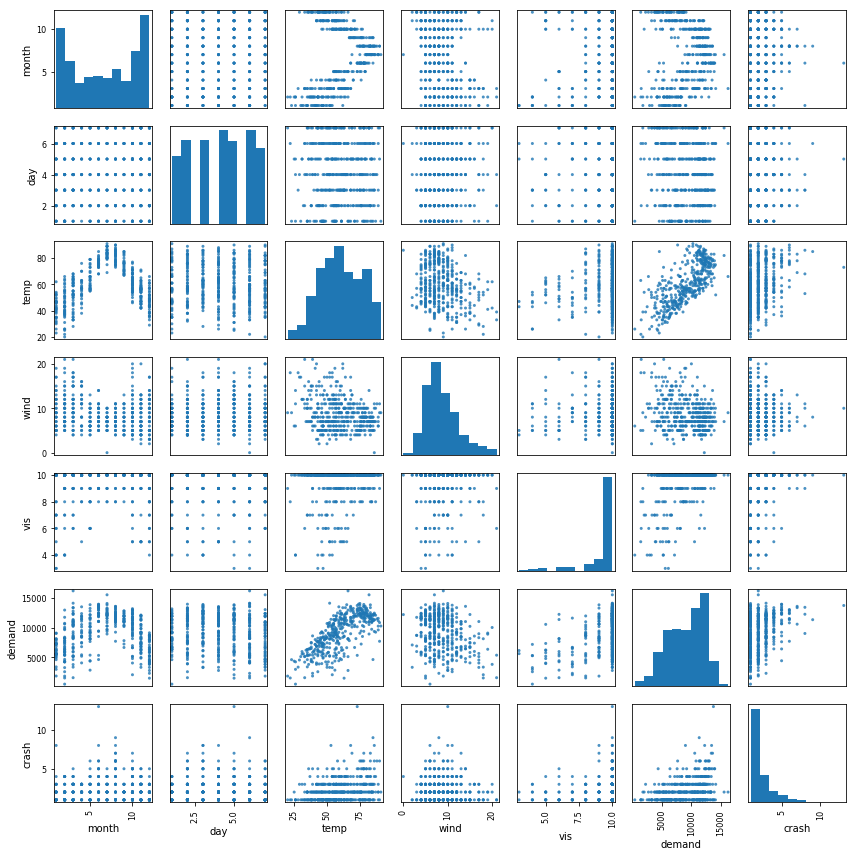

In [26]:
df_pre=pd.read_csv(r"C:\Bike_TH\featrue_file_mod.csv")


# scatter plot matrix
fig=plt.figure(figsize=(12,12))
axes = plt.subplot2grid((3,1), (0,0), rowspan=3, colspan=1)
pd.plotting.scatter_matrix(df_pre, alpha=0.8,ax=axes)
plt.tight_layout()
plt.savefig(r"C:\Bike_TH\Matrix_Plot.png",dpi=400)
#fig.savefig(r"C:\Course_Study\TTE6608\HW1_Dr_Hasan\scatter_mat_bike.png",dpi=500)
plt.show()

LR: 0.481092 (0.067925)
LDA: 0.475294 (0.058806)
KNN: 0.361176 (0.089480)
CART: 0.337647 (0.068109)
NB: 0.490084 (0.067563)
SVM: 0.317815 (0.053089)


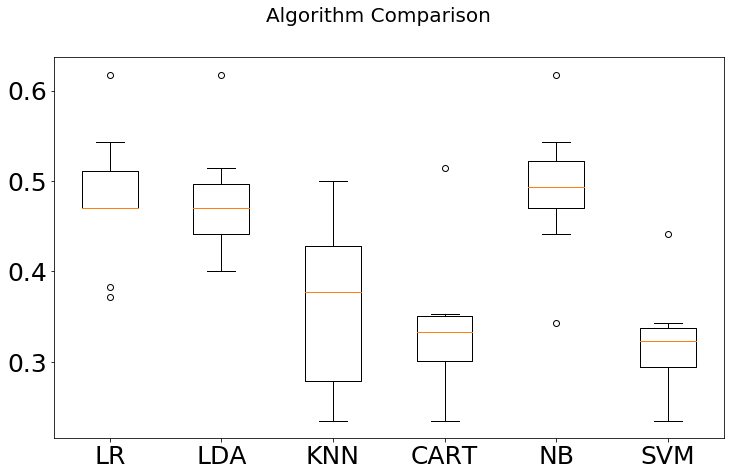

0.453488372093
[[14  5 13]
 [ 7  3 11]
 [10  1 22]]
             precision    recall  f1-score   support

          1       0.45      0.44      0.44        32
          2       0.33      0.14      0.20        21
          3       0.48      0.67      0.56        33

avg / total       0.43      0.45      0.43        86



In [31]:

import sys

import pandas as pd
import numpy as np

# Load libraries
import pandas
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#------------------------------------------------------------------
SMALL_SIZE = 12
MEDIUM_SIZE = 25
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






df=pd.read_csv(r"C:\Bike_TH\featrue_file_mod.csv")


df.replace('T', -99999, inplace =True)
df.replace('BNA',-99999,inplace=True)
#df.drop(['user_id'],1, inplace=True)
#df=df[df['efficiency'] !=0]

df['cat_crash']=pd.cut(df['crash'], bins=[-10, 1, 2, 15], include_lowest=True, labels=[ '1', '2', '3'])

df.drop(['crash'],1, inplace=True)


df.dropna(inplace=True)

validation_size = 0.20
seed = 7


X = np.array(df.drop(['cat_crash'],1))
y= np.array(df['cat_crash'])

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

'''
#--------------------------------------------------------------------------------

# Load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

# shape
print(dataset.shape)


# head
print(dataset.head(20))


# descriptions
print(dataset.describe())

# class distribution
print(df.groupby('cat_efficiency').size())

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


# histograms
dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()


# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
'''

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
 
# Compare Algorithms
fig = plt.figure(figsize=(12,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig(r"C:\Bike_TH\model_performance.png",dpi=400)
plt.show()



# Make predictions on validation dataset
knn = LinearDiscriminantAnalysis()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


# Ensemble Method

In [136]:
X=X
Y=y

In [137]:

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.259025470653


In [138]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier



seed = 7
num_trees = 10
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.245238095238


In [139]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 10
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.240199335548


In [140]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier



seed = 7
num_trees = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.26650055371


In [141]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.425714285714
